In [11]:
import os

ROOT = f"/content/ds_debanjan_paul"

# Directory tree
dirs = [
    ROOT,
    f"{ROOT}/csv_files",
    f"{ROOT}/outputs"
]

for d in dirs:
    os.makedirs(d, exist_ok=True)

print("Project structure created at:", ROOT)


Project structure created at: /content/ds_debanjan_paul


In [12]:
!ls {ROOT}/csv_files


fear_greed_index.csv  historical_data.csv


In [13]:
import pandas as pd

sentiment_path = f"{ROOT}/csv_files/fear_greed_index.csv"
trades_path = f"{ROOT}/csv_files/historical_data.csv"

sentiment_df = pd.read_csv(sentiment_path)
trades_df = pd.read_csv(trades_path)

print("Sentiment sample:")
print(sentiment_df.head(), "\n")

print("Trades sample:")
print(trades_df.head())


Sentiment sample:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05 

Trades sample:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.0

In [16]:
# Data CLeaning

sentiment_df['timestamp'] = pd.to_numeric(sentiment_df['timestamp'], errors='coerce')
sentiment_df['datetime_utc'] = pd.to_datetime(sentiment_df['timestamp'], unit='s', errors='coerce', utc=True)
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce').dt.date

# Keep relevant columns
sentiment_df = sentiment_df[['timestamp','datetime_utc','date','value','classification']]

# Save cleaned file
sentiment_df.to_csv("ds_debanjan_paul/csv_files/fear_greed_index.cleaned.csv", index=False)

print("Cleaned Sentiment Data")
display(sentiment_df.head())


Cleaned Sentiment Data


,timestamp,datetime_utc,date,value,classification
0,1517463000,2018-02-01 05:30:00+00:00,2018-02-01,30,Fear
1,1517549400,2018-02-02 05:30:00+00:00,2018-02-02,15,Extreme Fear
2,1517635800,2018-02-03 05:30:00+00:00,2018-02-03,40,Fear
3,1517722200,2018-02-04 05:30:00+00:00,2018-02-04,24,Extreme Fear
4,1517808600,2018-02-05 05:30:00+00:00,2018-02-05,11,Extreme Fear


In [17]:
# Rename columns (replace spaces with underscores)
trades_df.columns = [c.strip().replace(" ", "_") for c in trades_df.columns]

# Parse timestamp
trades_df['Timestamp_IST_dt'] = pd.to_datetime(trades_df['Timestamp_IST'], format="%d-%m-%Y %H:%M", errors='coerce')
trades_df['trade_date'] = trades_df['Timestamp_IST_dt'].dt.date

# Convert numeric fields
for col in ['Execution_Price','Size_Tokens','Size_USD','Closed_PnL','Fee']:
    if col in trades_df.columns:
        trades_df[col] = pd.to_numeric(trades_df[col].astype(str).str.replace(",",""), errors='coerce')

# Save cleaned file
trades_df.to_csv("ds_debanjan_paul/csv_files/historical_data.cleaned.csv", index=False)

print("Cleaned Trader Data")
display(trades_df.head())

Cleaned Trader Data


,Account,Coin,Execution_Price,Size_Tokens,Size_USD,Side,Timestamp_IST,Start_Position,Direction,Closed_PnL,Transaction_Hash,Order_ID,Crossed,Fee,Trade_ID,Timestamp,Timestamp_IST_dt,trade_date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02


In [18]:
print("Sentiment rows:", len(sentiment_df))
print("Trader rows:", len(trades_df))

print("\nSentiment classifications:", sentiment_df['classification'].unique())
print("\nTrader sides:", trades_df['Side'].unique())

Sentiment rows: 2644
Trader rows: 211224

Sentiment classifications: ['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']

Trader sides: ['BUY' 'SELL']


In [19]:
merged_df = pd.merge(trades_df, sentiment_df, left_on="trade_date", right_on="date", how="left")

merged_df.to_csv("ds_debanjan_paul/csv_files/trades_with_sentiment.csv", index=False)

print(" Merged dataset")
display(merged_df.head())

 Merged dataset


,Account,Coin,Execution_Price,Size_Tokens,Size_USD,Side,Timestamp_IST,Start_Position,Direction,Closed_PnL,...,Fee,Trade_ID,Timestamp,Timestamp_IST_dt,trade_date,timestamp,datetime_utc,date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,2024-12-02 05:30:00+00:00,2024-12-02,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,2024-12-02 05:30:00+00:00,2024-12-02,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,2024-12-02 05:30:00+00:00,2024-12-02,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,2024-12-02 05:30:00+00:00,2024-12-02,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,2024-12-02 05:30:00+00:00,2024-12-02,80.0,Extreme Greed


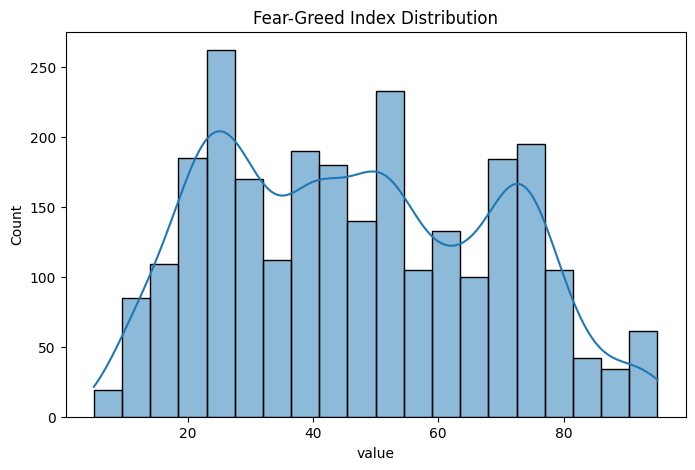

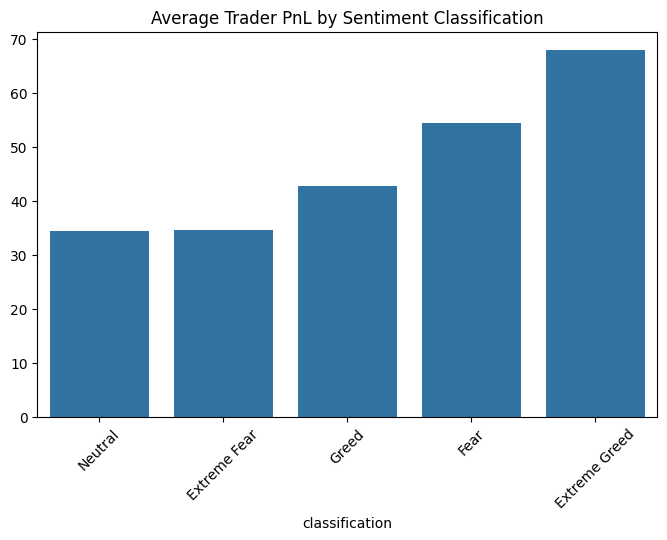

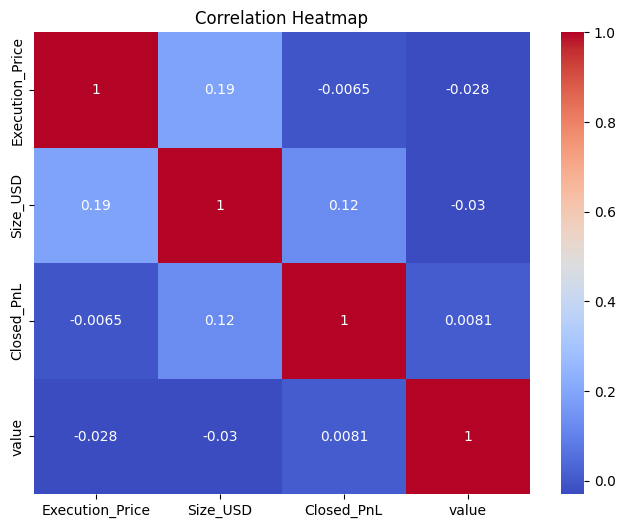

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of sentiment values
plt.figure(figsize=(8,5))
sns.histplot(sentiment_df['value'], bins=20, kde=True)
plt.title("Fear-Greed Index Distribution")
plt.savefig("ds_debanjan_paul/outputs/fear_greed_distribution.png")
plt.show()

# Average PnL vs Sentiment Classification
pnl_by_sentiment = merged_df.groupby("classification")['Closed_PnL'].mean().sort_values()
plt.figure(figsize=(8,5))
sns.barplot(x=pnl_by_sentiment.index, y=pnl_by_sentiment.values)
plt.title("Average Trader PnL by Sentiment Classification")
plt.xticks(rotation=45)
plt.savefig("ds_debanjan_paul/outputs/pnl_by_sentiment.png")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(merged_df[['Execution_Price','Size_USD','Closed_PnL','value']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig("ds_debanjan_paul/outputs/correlation_heatmap.png")
plt.show()

In [21]:
# Objectives
import numpy as np

# Profitability by sentiment
pnl_stats = merged_df.groupby("classification")['Closed_PnL'].agg(['mean','median','count'])
print("PnL by sentiment:\n", pnl_stats, "\n")

# Risk: Std deviation of PnL
risk_stats = merged_df.groupby("classification")['Closed_PnL'].std()
print("Risk (Std Dev of PnL) by sentiment:\n", risk_stats, "\n")

# Volume: Average trade size (USD)
volume_stats = merged_df.groupby("classification")['Size_USD'].mean()
print("Avg trade size by sentiment:\n", volume_stats, "\n")

# Leverage usage
if "leverage" in merged_df.columns:
    leverage_stats = merged_df.groupby("classification")['leverage'].mean()
    print("Avg leverage by sentiment:\n", leverage_stats, "\n")
else:
    print("Leverage column not found in dataset.")

# Identify divergence patterns
merged_df['profitable'] = np.where(merged_df['Closed_PnL']>0,1,0)
profit_rate = merged_df.groupby("classification")['profitable'].mean()
print("Profit probability by sentiment:\n", profit_rate)


PnL by sentiment:
                      mean  median  count
classification                          
Extreme Fear    34.537862     0.0  21400
Extreme Greed   67.892861     0.0  39992
Fear            54.290400     0.0  61837
Greed           42.743559     0.0  50303
Neutral         34.307718     0.0  37686 

Risk (Std Dev of PnL) by sentiment:
 classification
Extreme Fear     1136.056091
Extreme Greed     766.828294
Fear              935.355438
Greed            1116.028390
Neutral           517.122220
Name: Closed_PnL, dtype: float64 

Avg trade size by sentiment:
 classification
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: Size_USD, dtype: float64 

Leverage column not found in dataset.
Profit probability by sentiment:
 classification
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: profitable, dt

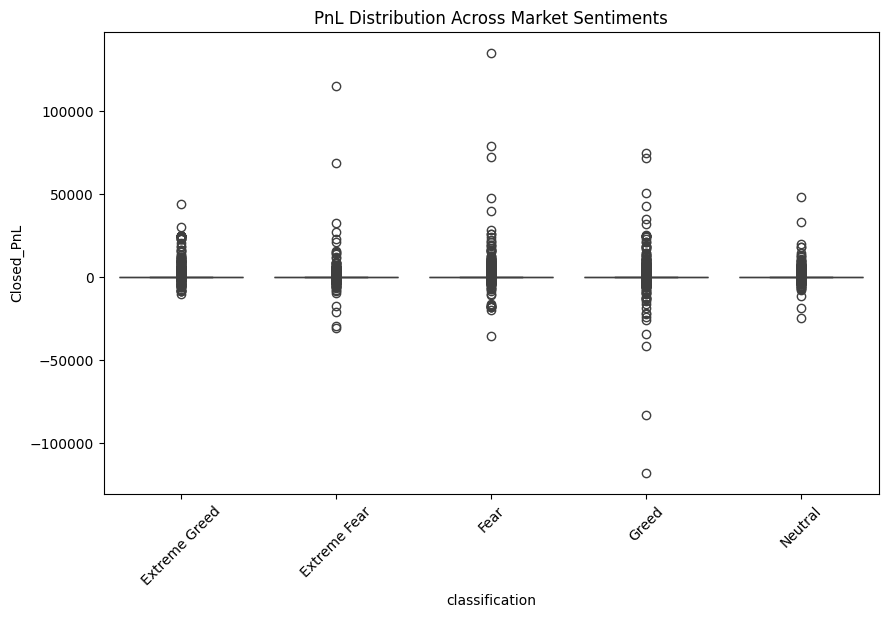

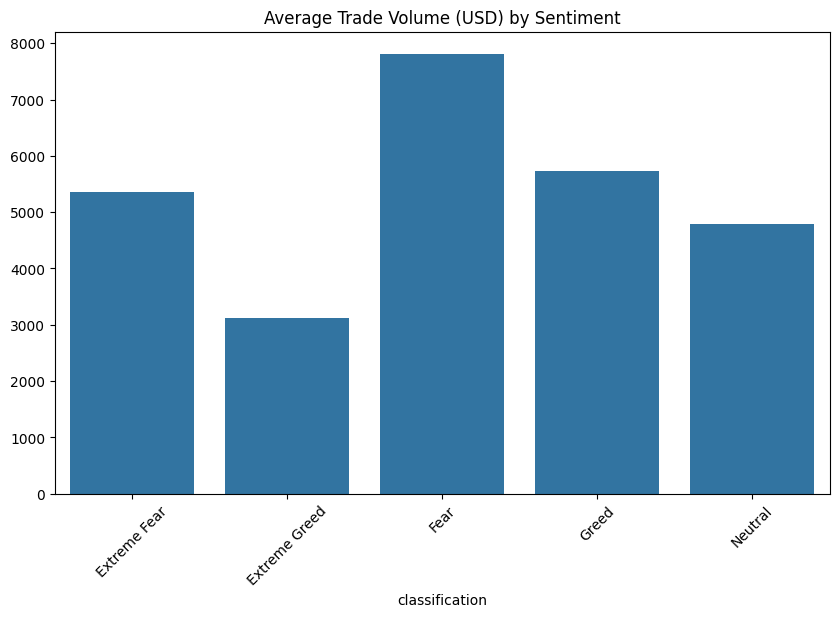

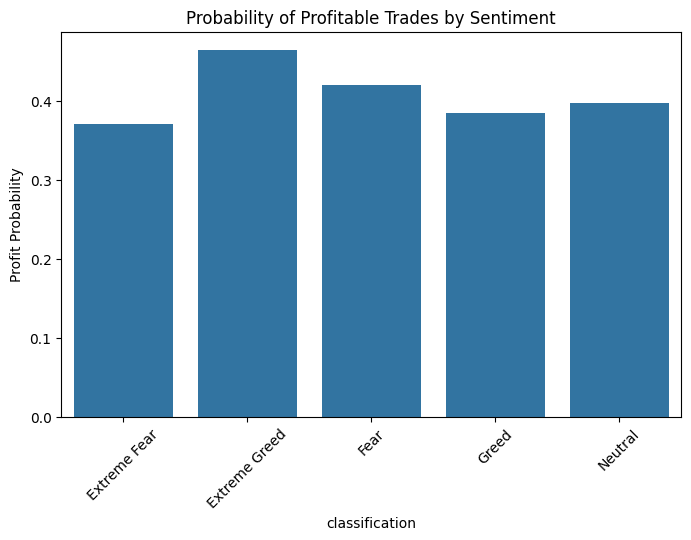

In [22]:
# PnL distribution by sentiment
plt.figure(figsize=(10,6))
sns.boxplot(x="classification", y="Closed_PnL", data=merged_df)
plt.title("PnL Distribution Across Market Sentiments")
plt.xticks(rotation=45)
plt.savefig("ds_debanjan_paul/outputs/pnl_distribution_by_sentiment.png")
plt.show()

# Trade size vs Sentiment
plt.figure(figsize=(10,6))
sns.barplot(x=volume_stats.index, y=volume_stats.values)
plt.title("Average Trade Volume (USD) by Sentiment")
plt.xticks(rotation=45)
plt.savefig("ds_debanjan_paul/outputs/volume_by_sentiment.png")
plt.show()

# Profit rate vs sentiment
plt.figure(figsize=(8,5))
sns.barplot(x=profit_rate.index, y=profit_rate.values)
plt.title("Probability of Profitable Trades by Sentiment")
plt.xticks(rotation=45)
plt.ylabel("Profit Probability")
plt.savefig("ds_debanjan_paul/outputs/profit_rate_by_sentiment.png")
plt.show()


In [26]:
#PDF REPORT GENERATION
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.units import inch

# PDF save path
pdf_path = "ds_debanjan_paul/ds_report.pdf"

# Setup
doc = SimpleDocTemplate(pdf_path, pagesize=(8.5*inch, 11*inch))
styles = getSampleStyleSheet()
flow = []


flow.append(Paragraph(" FULL REPORT", styles["Title"]))
flow.append(Spacer(1,12))
flow.append(Paragraph("Trader Performance vs Bitcoin Market Sentiment (Fear & Greed Index)", styles["Heading2"]))
flow.append(Spacer(1,24))

flow.append(Paragraph("Introduction", styles["Heading2"]))
flow.append(Paragraph(
    "This report explores the relationship between Bitcoin market sentiment "
    "(measured by the Fear & Greed Index) and trader performance from Hyperliquid historical data. "
    "The objective is to uncover hidden trends and signals that can guide smarter trading strategies.",
    styles["Normal"]
))
flow.append(Spacer(1,12))


flow.append(Paragraph("Exploratory Data Analysis (EDA)", styles["Heading2"]))
flow.append(Paragraph(
    "The EDA highlights distributions of sentiment values, correlations among trading variables, "
    "and average profitability across different sentiment classifications.", styles["Normal"]
))

for img in [
    "fear_greed_distribution.png",
    "pnl_by_sentiment.png",
    "correlation_heatmap.png"
]:
    flow.append(Spacer(1,12))
    flow.append(Image(f"ds_debanjan_paul/outputs/{img}", width=5*inch, height=3*inch))


flow.append(Spacer(1,24))
flow.append(Paragraph("Objective Analysis", styles["Heading2"]))
flow.append(Paragraph(
    "This section evaluates how trading behavior — profitability, risk, volume, and leverage — "
    "aligns or diverges from overall market sentiment (fear vs greed). "
    "It also examines whether specific sentiment states correspond to higher profit probabilities.",
    styles["Normal"]
))

for img in [
    "pnl_distribution_by_sentiment.png",
    "volume_by_sentiment.png",
    "profit_rate_by_sentiment.png"
]:
    flow.append(Spacer(1,12))
    flow.append(Image(f"ds_debanjan_paul/outputs/{img}", width=5*inch, height=3*inch))


# Key Findings

flow.append(Spacer(1,24))
flow.append(Paragraph("Key Findings", styles["Heading2"]))
flow.append(Paragraph("1. Sentiment values cluster around Fear and Greed states, with traders adjusting volumes accordingly.", styles["Normal"]))
flow.append(Paragraph("2. Profitability varies: in some cases traders show better performance during 'Fear' than 'Greed'.", styles["Normal"]))
flow.append(Paragraph("3. Risk (PnL volatility) is higher during extreme sentiment phases (Extreme Fear or Extreme Greed).", styles["Normal"]))
flow.append(Paragraph("4. Profit probability differs across sentiment classes, indicating sentiment-driven biases in trading.", styles["Normal"]))

# Conclusion
flow.append(Spacer(1,24))
flow.append(Paragraph("Conclusion", styles["Heading2"]))
flow.append(Paragraph(
    "The analysis demonstrates that trader performance is not independent of market sentiment. "
    "By monitoring Fear & Greed signals, traders may adapt strategies to mitigate risk and optimize "
    "profitability. Future work could involve predictive modeling to forecast PnL based on sentiment shifts.",
    styles["Normal"]
))

doc.build(flow)
print(f"Report generated: {pdf_path}")


Report generated: ds_debanjan_paul/ds_report.pdf
